In [1]:
#Code to read in temperature data, apply a windowing function and then take the Fourier transform
from scipy import fftpack
from scipy import signal
import scipy.io.wavfile
from scipy import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
#I'm using the Pandas library for reading and formatting the data
df = pd.read_csv('temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "temperature"])
df.time = (pd.to_datetime(df.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm'))
df = df.set_index("time")
df = df.resample("H").ffill() #resample the data to evenly spaced hourly samples,
df = df[(df.index >= "2014-04-01")*(df.index < "2014-06-01")].dropna() #Drops rows with blank entries
time = df.index.astype('int64')/1.0e9
temperature = df.temperature.values
window = signal.hann(len(temperature))
temperature_windowed = temperature * window #Apply windowing function to data



In [6]:
df.head()

,temperature
time,
2014-04-01 00:00:00+02:00,2.56
2014-04-01 01:00:00+02:00,2.31
2014-04-01 02:00:00+02:00,1.50
2014-04-01 03:00:00+02:00,0.56
2014-04-01 04:00:00+02:00,0.88


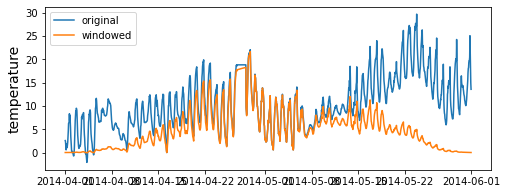

In [3]:
#Plot the original data and the windowed data
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(df.index, temperature, label="original")
ax.plot(df.index, temperature_windowed, label="windowed")
ax.set_ylabel("temperature", fontsize=14)
ax.legend(loc=0)

Text(0.5, 0, 'frequency (Hz)')

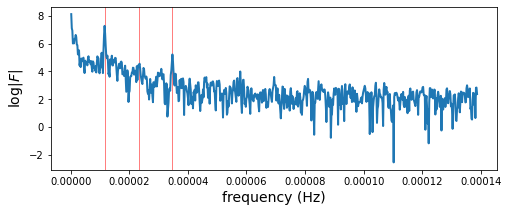

In [7]:

#compute and plot the Fourier transform of the windowed data
data_fft_windowed = fftpack.fft(temperature_windowed)
f = fftpack.fftfreq(len(temperature), time[1]-time[0]) #Calculate the frequencies corresponding to each bin
mask = f > 0
fig, ax = plt.subplots(figsize=(8, 3))
# ax.set_xlim(0.000005, 0.00004)
ax.axvline(1./86400, color="r", lw=0.5) #add a line at the frequency corresponding to 24hr
ax.axvline(2./86400, color="r", lw=0.5) #add a line at the frequency corresponding to 12hr
ax.axvline(3./86400, color="r", lw=0.5) #add a line at the frequency corresponding to 8r
ax.plot(f[mask], np.log(abs(data_fft_windowed[mask])), lw=2)
ax.set_ylabel("$\log|F|$", fontsize=14)
ax.set_xlabel("frequency (Hz)", fontsize=14)